# Used Car Price Prediction Using ML & DL
So called Second hand's car have a huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The main reason for this huge market is that when you buy a New Car and sale it just another day without any default on it, the price of car reduces by 30%.

There are also many frauds in the market who not only sale wrong but also they could mislead to wrong price.

So, here I used this following dataset to Predict the price of any used car.


# Import Liberary's


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Data Loading

In [3]:
train_data =  pd.read_csv('train-data.csv')
test_data =  pd.read_csv('test-data.csv')

In [4]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
train_data = train_data.iloc[:, 1:]
train_data.shape

(6019, 13)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [9]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
train_data['Kilometers_Driven'].value_counts()

60000     82
45000     70
65000     68
50000     61
70000     60
          ..
58205      1
24350      1
134000     1
21363      1
30717      1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [11]:
print('Unique Locations \n', train_data['Location'].unique())
print('Fuel Type \n', train_data['Fuel_Type'].unique())
print('Transmission Type \n', train_data['Transmission'].unique())
print('Owner Types \n', train_data['Owner_Type'].unique())

Unique Locations 
 ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel Type 
 ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission Type 
 ['Manual' 'Automatic']
Owner Types 
 ['First' 'Second' 'Fourth & Above' 'Third']


In [12]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Lets drop some row which contains NULL values

I Ignored New_Price column because it contains many null values

In [13]:
#Another Method of removing NULL Values

#train1 = train_data.dropna()

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [15]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage:",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine:",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power:",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats:",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage: (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine: (5981, 13)
Shape of train data After dropping Rows with NULL values in Power: (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats: (5975, 13)


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 653.5+ KB


In [17]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5152
Price                   0
dtype: int64

In [18]:
train_data = train_data.reset_index(drop = True)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 607.0+ KB


# Feautre Engineering 🛠
There are many different data which could be extarcted from present. 
And, that's where Feature Engineering comes.

In [20]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [21]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.2,1968,140.8


In [22]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5975 non-null   float64
 13  Company            5975 non-null   object 
 14  Mileage(km/kg)     5975 non-null   float64
 15  Engine(CC)         5975 non-null   float64
 16  Power(bhp)         5975 

In [24]:
train_data['Power'][76]

'null bhp'

In [25]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i] == 'null':
        x = 'Y'
        count += 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [26]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [27]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [28]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [29]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5872 non-null   float64
 13  Company            5872 non-null   object 
 14  Mileage(km/kg)     5872 non-null   float64
 15  Engine(CC)         5872 non-null   float64
 16  Power(bhp)         5872 

In [31]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

# Data Visualization

Let's Plot some

Data visualization is the best way to find out how a data looks like


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


Price

In [33]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

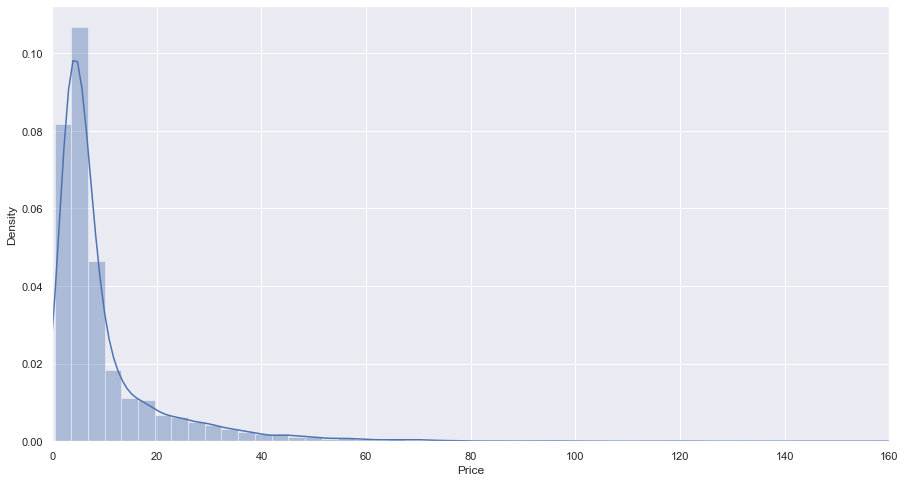

In [34]:
f, ax = plt.subplots(figsize = (15, 8))
sns.distplot(train_data['Price'])
plt.xlim([0, 160])

Fuel Type

In [35]:
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

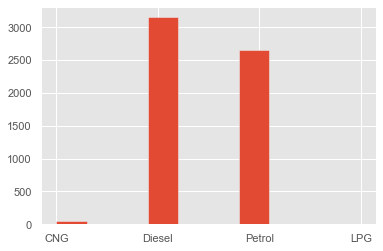

In [36]:
plt.style.use('ggplot')
plt.hist(train_data['Fuel_Type'], bins = 10)
plt.show()

As, we thought diseal car would cost followed Petrol.

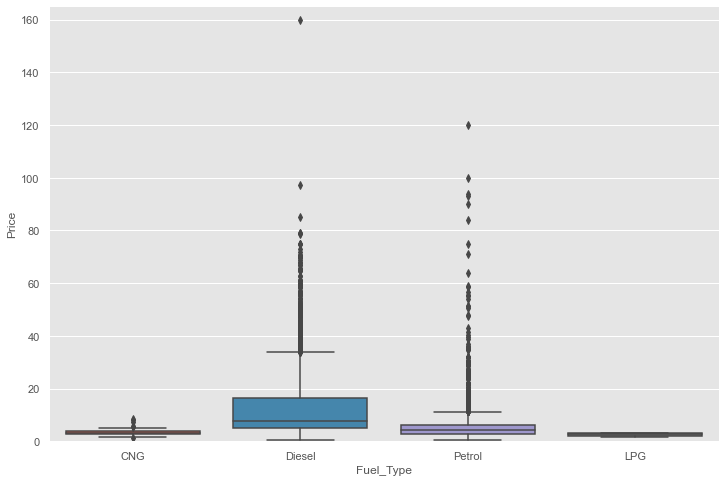

In [37]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

In [38]:
# var = 'Fuel_Type'
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
# sns.swarmplot(x = var, y ='Price', data = train_data)

Year

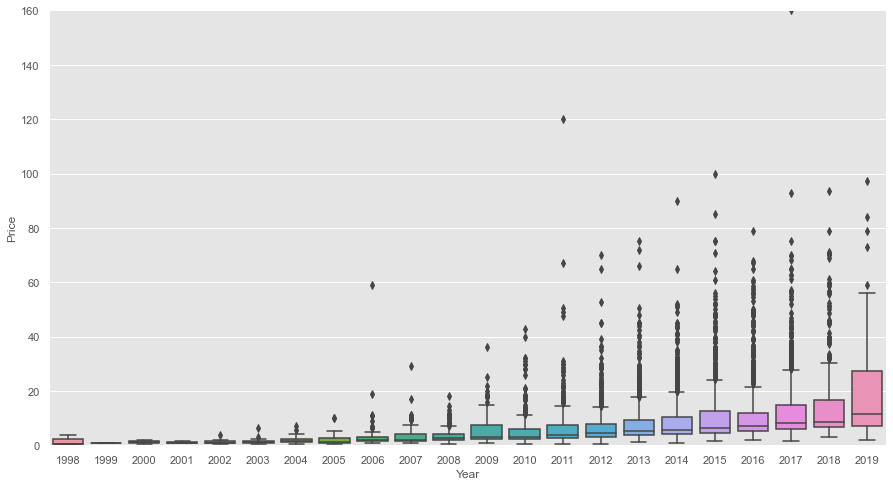

In [39]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=160)
plt.show()

Price of Newest is high compared to old models.

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

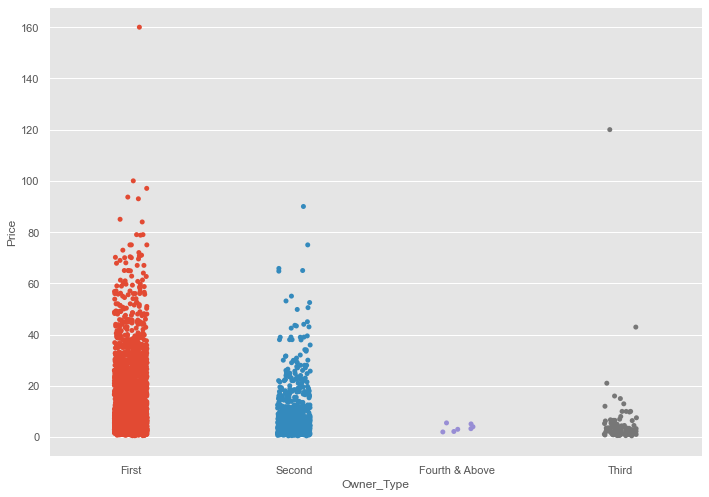

In [40]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x=var, y='Price', data=train_data)

Company

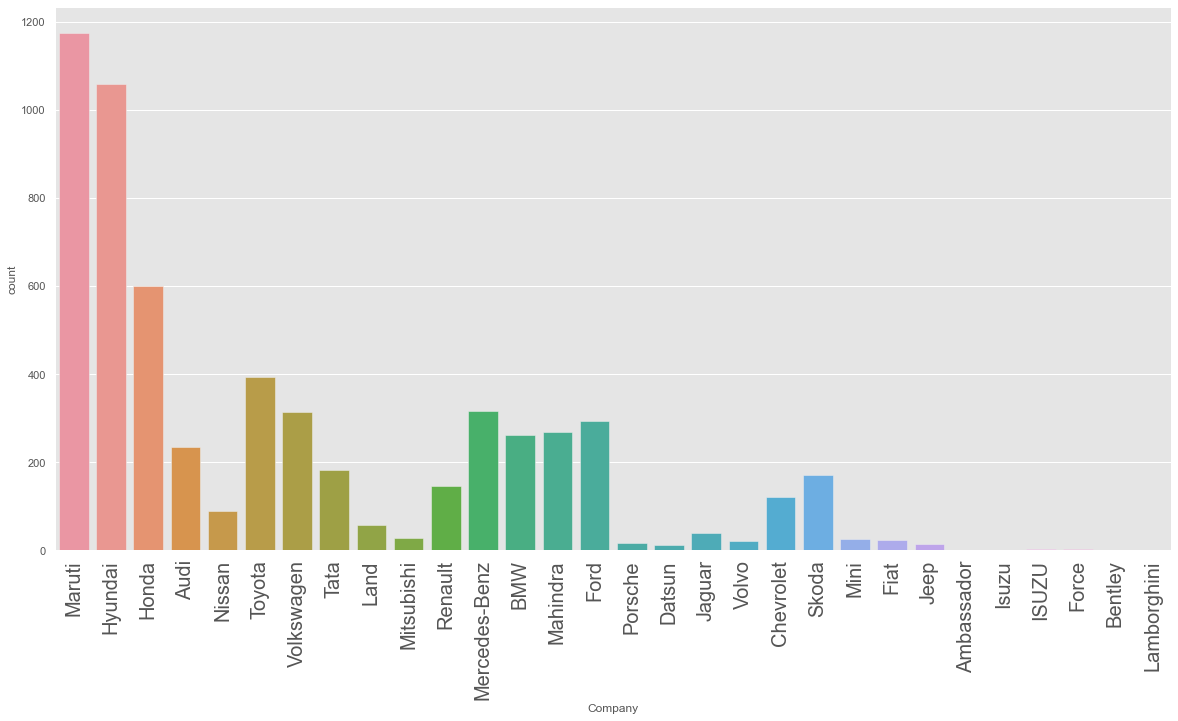

In [41]:
var = 'Company'
plt.figure(figsize=(20, 10))
sns.countplot(x=var, data=train_data)
plt.xticks(rotation=90, fontsize=20);

Cleary Maruti is most comman brand followed by Hyundai

In [42]:
# var = "Company"
# plt.figure(figsize=(20, 10))
# sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
# plt.xticks(rotation=90);

# Working with Categorical Data

As for now we have left with only 5 categorical features:

1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

For hadeling categorical data. We modtly use these 2 path:

1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.



In [43]:
train_data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

From above values, we could judge that Mubmai has most number of 
cars to be sold followed by others.

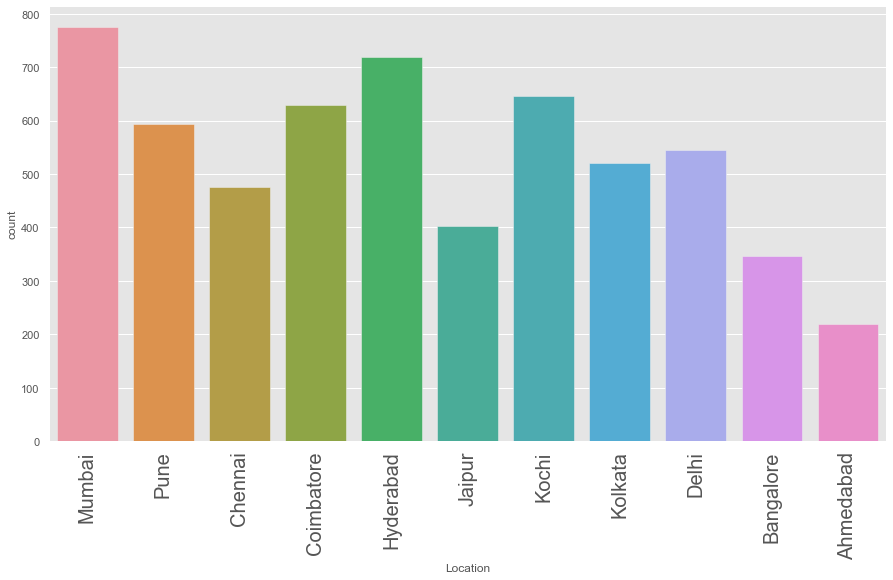

In [44]:
var = 'Location'
plt.figure(figsize=(15, 8))
sns.countplot(x=var, data=train_data)
plt.xticks(rotation=90, fontsize=20);

<function matplotlib.pyplot.show(close=None, block=None)>

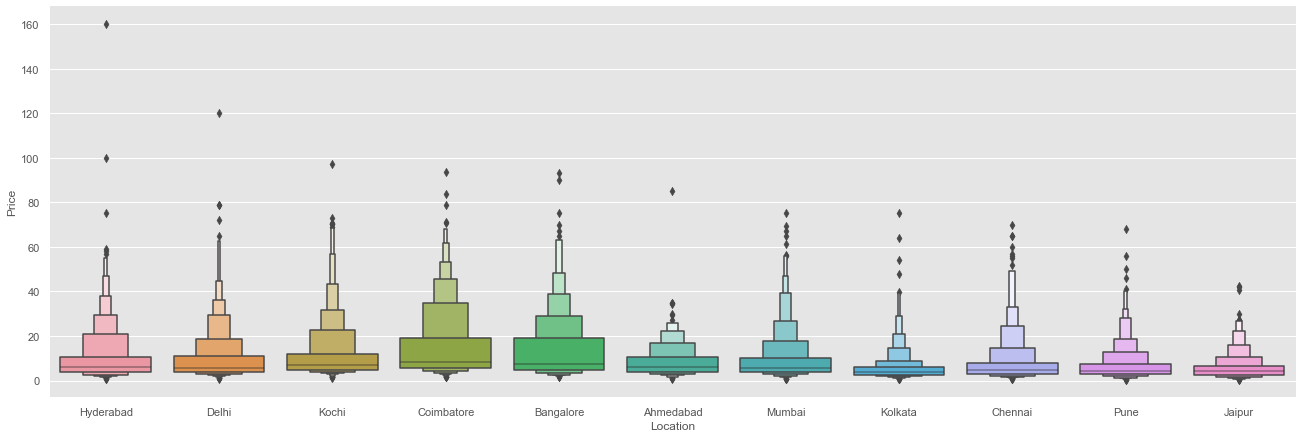

In [45]:
# Plot Location vs Price
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [46]:
from sklearn.preprocessing import LabelEncoder
lr1 = LabelEncoder()
train_data['Location_1'] = lr1.fit_transform(train_data['Location'])

In [47]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Location_1
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,9
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,10
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,2
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,2
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,3


We will be using One-hot-encoding here

In [48]:
# Location = train_data[['Location']]
# Location = pd.get_dummies(Location, drop_first=True)
# Location.head()

Working for Fuel_Type

In [49]:
train_data['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'CNG'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Petrol'),
  Text(3, 0, 'LPG')])

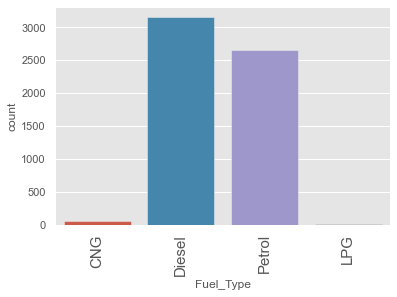

In [50]:
#plt.figure(figsize=(10, 5))
sns.countplot(x=train_data['Fuel_Type'], data=train_data)
plt.xticks(rotation=90, fontsize=15)

In [51]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Location_1
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,9
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,10
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,2
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,2
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,3


In [52]:
# train_data.replace({"Petrol":1,"Diesel":2,"CNG": 3,"LPG":4})
# train_data.head()
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
train_data['Fuel_Type_1'] = lr.fit_transform(train_data['Fuel_Type'])

In [53]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Location_1,Fuel_Type_1
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,9,0
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,10,1
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,2,3
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,2,1
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,3,1


In [54]:
# Fuel_Type = pd.get_dummies(train_data['Fuel_Type'], drop_first=True)
# Fuel_Type.head()

Working with Transmission


In [55]:
train_data['Transmission'].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

(array([0, 1]), [Text(0, 0, 'Manual'), Text(1, 0, 'Automatic')])

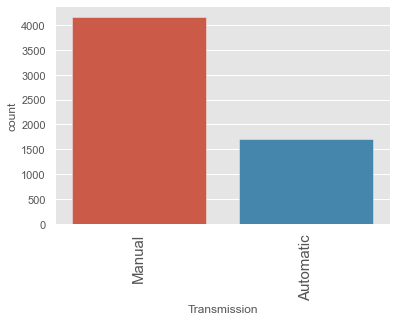

In [56]:
#plt.figure(figsize=(10, 5))
sns.countplot(x=train_data['Transmission'], data=train_data)
plt.xticks(rotation=90, fontsize=15)

In [57]:
# Transmission = pd.get_dummies(train_data['Transmission'], drop_first=True)
# Transmission.head()
lr = LabelEncoder()
train_data['Transmission_1'] = lr.fit_transform(train_data['Transmission'])
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Location_1,Fuel_Type_1,Transmission_1
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,9,0,1
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,10,1,1
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,2,3,1
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,2,1,1
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,3,1,0


Working with Owner_Type

In [58]:
train_data['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'First'),
  Text(1, 0, 'Second'),
  Text(2, 0, 'Fourth & Above'),
  Text(3, 0, 'Third')])

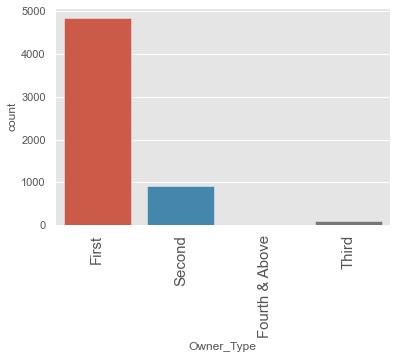

In [59]:
#plt.figure(figsize=(10, 5))
sns.countplot(x=train_data['Owner_Type'], data=train_data)
plt.xticks(rotation=90, fontsize=15)

As Owner_Type column has ordered data so we will be using Label Encoding Finally

In [60]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4}, inplace=True)

In [61]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Location_1,Fuel_Type_1,Transmission_1
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,9,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,10,1,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,2,3,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,2,1,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,3,1,0


Working with Company

In [62]:
train_data['Company'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Lamborghini         1
Ambassador          1
Name: Company, dtype: int64

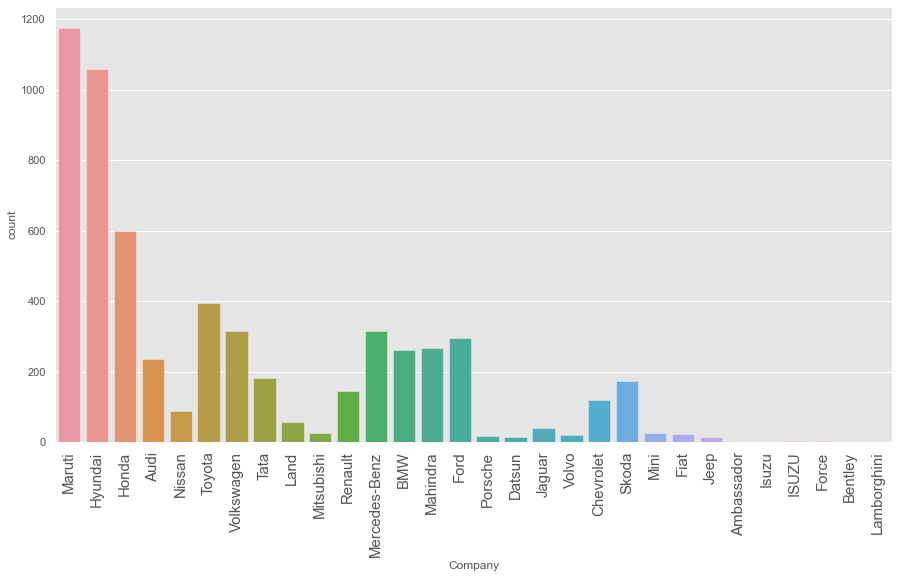

In [63]:
plt.figure(figsize=(15, 8))
sns.countplot(x=train_data['Company'], data=train_data)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [64]:
#A lot of variation so let's drop them

train_data = train_data.drop(["Company"],axis=1)


In [65]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price,Location_1,Fuel_Type_1,Transmission_1
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,58.16,NaN,9,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,126.20,NaN,10,1,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,88.70,8.61,2,3,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,88.76,NaN,2,1,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,140.80,NaN,3,1,0


In [66]:
# final_train= pd.concat([train_data,Location,Fuel_Type,Transmission],axis=1)
# final_train.head()

In [67]:
train_data.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_1,Fuel_Type_1,Transmission_1
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,9,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,10,1,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,2,3,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,2,1,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,3,1,0


In [68]:
train_data.shape

(5872, 11)

# Prapere Test Data

In [69]:
test_data.shape

(1234, 13)

In [70]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [71]:
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

# var = 'Location'
# Location = test_data[[var]]
# Location = pd.get_dummies(Location,drop_first=True)
# Location.head()
lr1 = LabelEncoder()
test_data['Location_1'] = lr1.fit_transform(test_data['Location'])
test_data.head()

# var = 'Fuel_Type'
# Fuel_t = test_data[[var]]
# Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
# Fuel_t.head()
lr = LabelEncoder()
test_data['Fuel_Type_1'] = lr.fit_transform(test_data['Fuel_Type'])
test_data.head()

# var = 'Transmission'
# Transmission = test_data[[var]]
# Transmission = pd.get_dummies(Transmission,drop_first=True)
# Transmission.head()
lr = LabelEncoder()
test_data['Transmission_1'] = lr.fit_transform(test_data['Transmission'])
test_data.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

# final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
# final_test.head()

test_data.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
test_data.head()

print("Final Test Size: ",test_data.shape)

Shape of test data Before dropping any Row:  (5872, 11)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 10)


In [72]:
test_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_1,Fuel_Type_1,Transmission_1
0,2014,40929,1,4.0,32.26,998.0,58.20,4,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,3,3,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,9,1,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,9,3,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,3,1,1


# Final Features Selection
As our train and test data are ready so now we have to only look for features on which we have to work.

In [73]:
print(train_data.columns)

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_1',
       'Fuel_Type_1', 'Transmission_1'],
      dtype='object')


In [74]:
# Split train data 

x = train_data.drop(['Price'], axis=1)
y = train_data['Price']

In [75]:
print(x.shape)
print(y.shape)

(5872, 10)
(5872,)


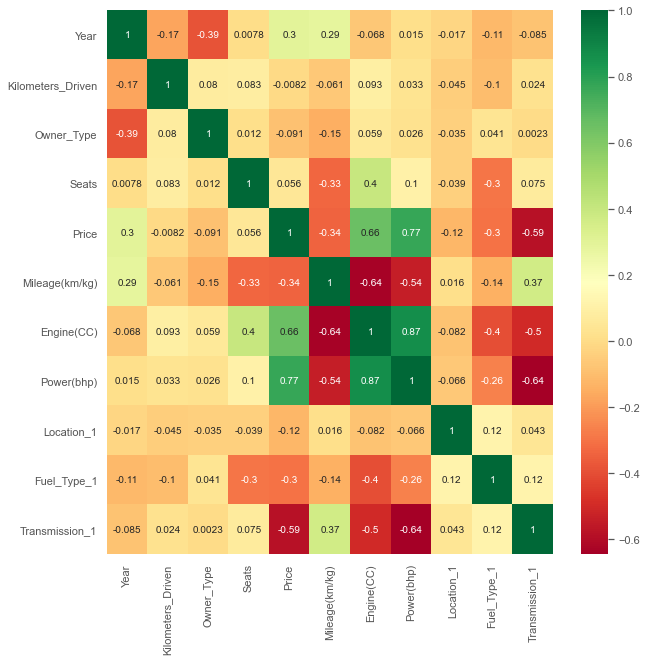

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

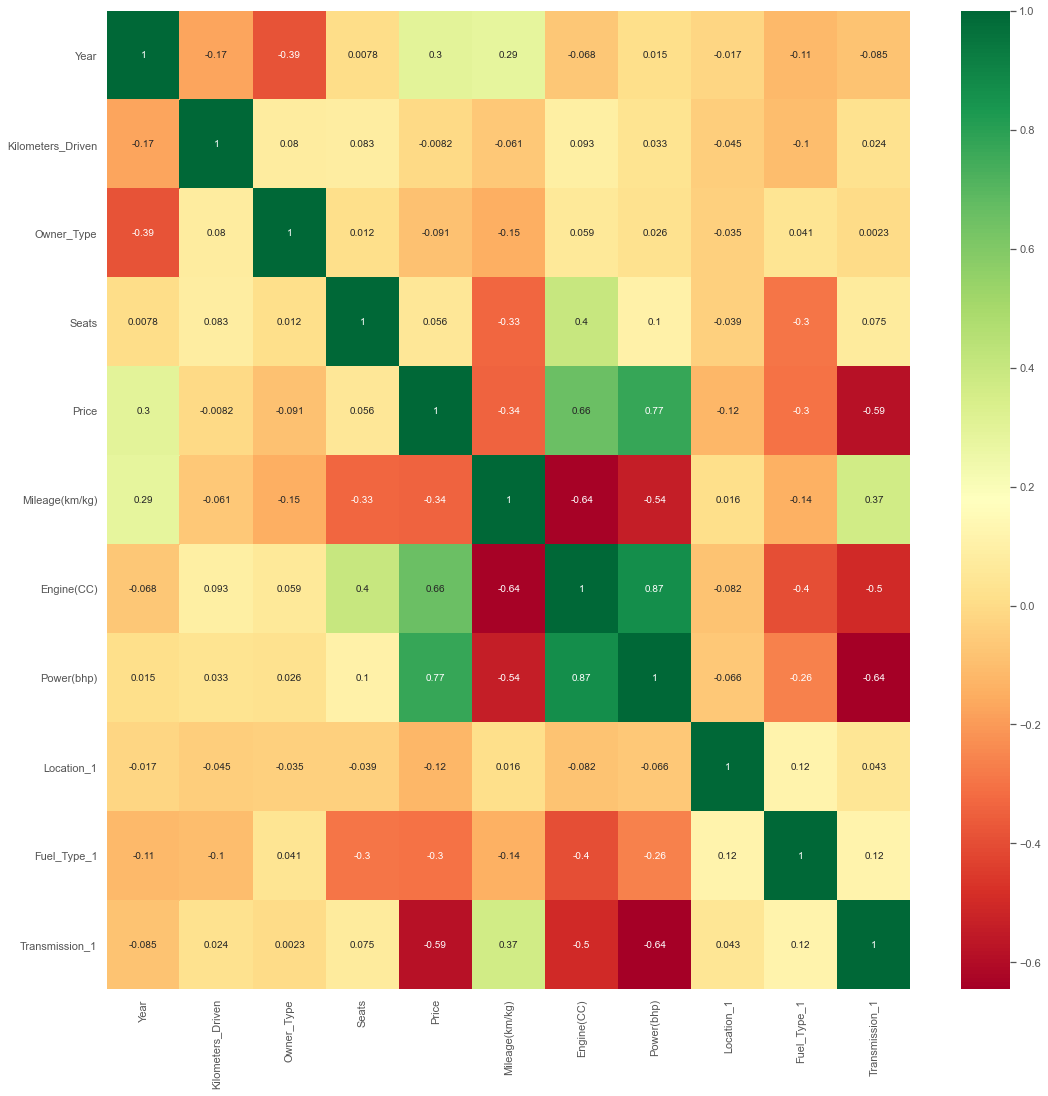

In [77]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

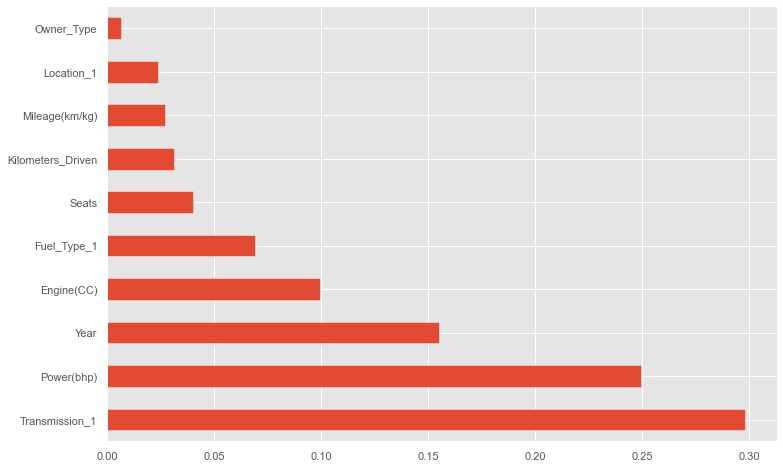

In [79]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Building

Train Test Split

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [81]:
print('Shape of x_train data',x_train.shape)
print('Shape of x_test data',x_test.shape)
print('Shape of y_train data',y_train.shape)
print('Shape of y_test data',y_test.shape)

Shape of x_train data (4697, 10)
Shape of x_test data (1175, 10)
Shape of y_train data (4697,)
Shape of y_test data (1175,)


In [82]:
x_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_1,Fuel_Type_1,Transmission_1
4433,2013,79663,1,5.0,16.80,1493.0,110.00,5,1,1
4332,2018,4500,1,5.0,18.90,1197.0,81.86,8,3,1
4027,2014,21000,1,5.0,23.10,998.0,67.04,9,3,1
3542,2014,54862,1,5.0,17.68,1968.0,174.33,7,1,0
3181,2015,7501,1,4.0,10.00,2996.0,333.00,8,3,0


1. Linear Regression Model

In [83]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

print("Accuracy on Traing set: ",linear.score(x_train,y_train))
print("Accuracy on Testing set: ",linear.score(x_test,y_test))

Accuracy on Traing set:  0.7021868269907521
Accuracy on Testing set:  0.6961530062565574


 2. Random Forest Regressor Model

In [84]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print("Accuracy on Traing set: ",random_forest.score(x_train,y_train))
print("Accuracy on Testing set: ",random_forest.score(x_test,y_test))

Accuracy on Traing set:  0.9841543942140399
Accuracy on Testing set:  0.9110075873028625


In [85]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))


		Error Table
Mean Absolute Error      :  1.5253815460992912
Mean Squared  Error      :  10.429058190037942
Root Mean Squared  Error :  3.229405237816701
R Squared Error          :  0.9110075873028625


HuperParameter Tuning

In [86]:
regressor=RandomForestRegressor()

In [87]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [90]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [91]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [92]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [93]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [95]:
rf_random.best_score_

-14.802581099811135

In [96]:
predictions=rf_random.predict(x_test)

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

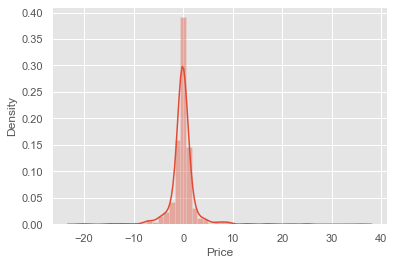

In [97]:
sns.distplot(y_test-predictions)

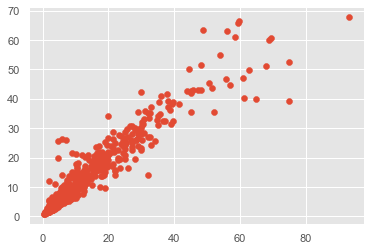

In [98]:
plt.scatter(y_test,predictions)

In [99]:
from sklearn import metrics

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.4987810624075901
MSE: 10.117484737816186
RMSE: 3.1807993866033404


In [101]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

#  Model

In [ ]:
#import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import Adam # Optimizer
from keras.callbacks import EarlyStopping # Early Stopping Callback
from kerastuner.tuners import RandomSearch # HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore') # To ignore warnings.


In [ ]:
# Create Model
def baseline_model():

    model = Sequential()
    model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(optimizer='Adam', loss='mean_squared_error')
    return model

In [ ]:
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10)
#results = cross_val_score(estimator, x, y, cv=kfold)
#print('BaseLine: %2f(%2f) MSE'%(results.mean(), results.std()))

In [ ]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=3,
    directory='model_dir',
    project_name='House_Price_Prediction')
 
tuner.search(x[1100:],y[1100:],batch_size=128,epochs=200,validation_data=(x[:1100],y[:1100]))


In [ ]:
model = tuner.get_best_models(1)[0]

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=21, activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mse')
    return model
model = create_model()
model.summary()


Epoch 1/1000
42/42 [==============================] - 1s 9ms/step - loss: 194302.5490 - val_loss: 97.2134
Epoch 2/1000
42/42 [==============================] - 0s 6ms/step - loss: 1335.8107 - val_loss: 1740.3674
Epoch 3/1000
42/42 [==============================] - 0s 6ms/step - loss: 785.3173 - val_loss: 2450.6582
Epoch 4/1000
42/42 [==============================] - 0s 6ms/step - loss: 7765.3124 - val_loss: 850.7845
Epoch 5/1000
42/42 [==============================] - 0s 6ms/step - loss: 577.0096 - val_loss: 11939.4141
Epoch 6/1000
42/42 [==============================] - 0s 6ms/step - loss: 73376.0023 - val_loss: 95.3846
Epoch 7/1000
42/42 [==============================] - 0s 6ms/step - loss: 969.2621 - val_loss: 2155.2471
Epoch 8/1000
42/42 [==============================] - 0s 6ms/step - loss: 1883.0258 - val_loss: 1827.5040
Epoch 9/1000
42/42 [==============================] - 0s 6ms/step - loss: 76935.9141 - val_loss: 167.8056
Epoch 10/1000
42/42 [=============================

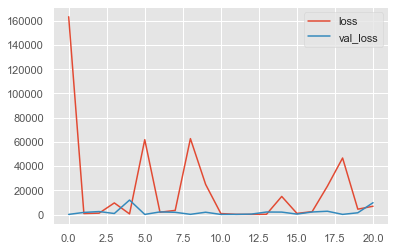

In [86]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=x,y=y,
          validation_split=0.1,
          batch_size=128,epochs=1000, callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)
losses.plot()


Epoch 1/170
46/46 [==============================] - 1s 4ms/step - loss: 7492151.1463
Epoch 2/170
46/46 [==============================] - 0s 5ms/step - loss: 860.9352
Epoch 3/170
46/46 [==============================] - 0s 5ms/step - loss: 242.1459
Epoch 4/170
46/46 [==============================] - 0s 5ms/step - loss: 267.1199
Epoch 5/170
46/46 [==============================] - 0s 4ms/step - loss: 2902.3379
Epoch 6/170
46/46 [==============================] - 0s 5ms/step - loss: 92.1529
Epoch 7/170
46/46 [==============================] - 0s 5ms/step - loss: 6583.2723
Epoch 8/170
46/46 [==============================] - 0s 5ms/step - loss: 1607.6650
Epoch 9/170
46/46 [==============================] - 0s 5ms/step - loss: 3192.8139
Epoch 10/170
46/46 [==============================] - 0s 4ms/step - loss: 1094.1754
Epoch 11/170
46/46 [==============================] - 0s 5ms/step - loss: 47312.7976
Epoch 12/170
46/46 [==============================] - 0s 5ms/step - loss: 979.4713
Epo

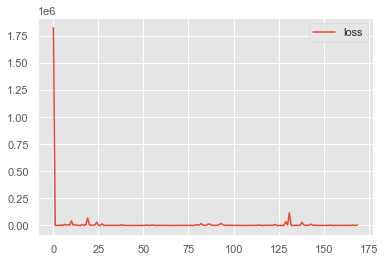

In [88]:
model = create_model() # Resetting the model.
history = model.fit(x=x,y=y,
          batch_size=128,epochs=170)

losses = pd.DataFrame(model.history.history)
losses.plot()


In [1]:
model(x_train,y_train)

NameError: name 'model' is not defined

In [91]:
# def plot_hist(h, xsize=6, ysize=10):
#     # Prepare plotting
#     fig_size = plt.rcParams["figure.figsize"]
#     plt.rcParams["figure.figsize"] = [xsize, ysize]
#     fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
#     # summarize history for MAE
#     plt.subplot(211)
#     plt.plot(h['mean_absolute_error'])
#     plt.plot(h['val_mean_absolute_error'])
#     plt.title('Training vs Validation MAE')
#     plt.ylabel('MAE')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')
    
#     # summarize history for loss
#     plt.subplot(212)
#     plt.plot(h['loss'])
#     plt.plot(h['val_loss'])
#     plt.title('Training vs Validation Loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')
    
#     # Plot it all in IPython (non-interactive)
#     plt.draw()
#     plt.show()

#     return

In [109]:
import flask